기계학습 기말 대체 과제입니다
201921018 이준배

1. 데이터 
학번이 짝수로 끝나므로 wine_review.csv 데이터 파일로 과제를 진행하겠습니다.
wine_review.csv

In [155]:
# 데이터 읽기
import pandas as pd

# CSV 파일 경로
file_path = 'wine_review.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df)

                        id asins                 brand  \
0     AV13ClKCGV-KLJ3akN68   NaN                 Gallo   
1     AV13CsvW-jtxr-f38AQO   NaN       Fresh Craft Co.   
2     AV13CVI_glJLPUi8O7Po   NaN          1000 Stories   
3     AV13CVI_glJLPUi8O7Po   NaN          1000 Stories   
4     AV13CYL4-jtxr-f37_-t   NaN          Wine Cube153   
...                    ...   ...                   ...   
2885  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2886  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2887  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2888  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   
2889  AV654xcDYSSHbkXwoTj_   NaN  Vintage Wine Estates   

                                             categories             dateAdded  \
0     Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:59:11Z   
1     Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:59:42Z   
2     Food & Beverage,Beverages,Wine, Beer & Liquor,...  201

데이터를 잘 읽은것을 볼 수 있습니다.
총 2890행과 32개의 열이 있는것을 알 수 있습니다. 
데이터중 5개만 읽어와 데이터가 어떠한 데이터인지 보겠습니다.

In [156]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


2. 데이터 전처리

결측치가 많은 열들이 있는것을 볼 수 있습니다. 
결측치가 많은 열들을 제가하는 작업을 하겠습니다. 

In [157]:
# 각 열별 결측값 수 합산하기
missing_counts = df.isnull().sum()
print(missing_counts)

id                         0
asins                   2020
brand                     65
categories                 0
dateAdded                  0
dateUpdated                0
descriptions             152
dimension               1052
ean                      724
flavors                 2739
keys                       0
manufacturer            2041
manufacturerNumber       433
name                       0
reviews.date             338
reviews.dateAdded          0
reviews.dateSeen           0
reviews.didPurchase      841
reviews.doRecommend      979
reviews.id              1005
reviews.numHelpful      2264
reviews.rating           445
reviews.sourceURLs         0
reviews.text               1
reviews.title             44
reviews.userCity        2808
reviews.userProvince    2881
reviews.username           2
sizes                   2868
sourceURLs                 0
upc                      147
weight                  1894
dtype: int64


In [158]:
# 결측값이 1000개 이상인 열 선택
columns_to_drop = missing_counts[missing_counts >= 1000].index.tolist()
print(columns_to_drop)

['asins', 'dimension', 'flavors', 'manufacturer', 'reviews.id', 'reviews.numHelpful', 'reviews.userCity', 'reviews.userProvince', 'sizes', 'weight']


In [159]:
# 결측값이 1000개 이상인 열 제거
df = df.drop(columns=columns_to_drop)
df.head()

,id,brand,categories,dateAdded,dateUpdated,descriptions,ean,keys,manufacturerNumber,name,...,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc
0,AV13ClKCGV-KLJ3akN68,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,NaN,"492130001994,gallo/13312834",13312834,Ecco Domani174 Pinot Grigio - 750ml Bottle,...,"2017-12-14T19:41:00.000Z,2017-12-19T19:55:00.0...",NaN,True,5.0,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,Bjh,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11
1,AV13CsvW-jtxr-f38AQO,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",NaN,"freshcraft/50392800,083120003441",50392800,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,...,"2017-12-17T05:32:00.000Z,2017-12-21T14:32:00.0...",NaN,True,5.0,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,Wino,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441
2,AV13CVI_glJLPUi8O7Po,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,NaN,"082896001453,1000stories/50399893",50399893,1000 Stories174 Zinfandel - 750ml Bottle,...,"2017-12-17T05:30:00.000Z,2017-12-21T14:29:00.0...",NaN,True,5.0,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,Bama Mom,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453
3,AV13CVI_glJLPUi8O7Po,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,NaN,"082896001453,1000stories/50399893",50399893,1000 Stories174 Zinfandel - 750ml Bottle,...,"2017-09-30T00:52:32.856Z,2017-08-08T10:33:31.6...",NaN,True,5.0,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",Av Dub,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453
4,AV13CYL4-jtxr-f37_-t,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",NaN,"winecube153/14831433,085200600465",14831433,Pink Moscato - 3l Bottle - Wine Cube153,...,"2017-12-16T09:19:00.000Z,2017-12-20T16:57:00.0...",NaN,True,5.0,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Chelseamay,https://redsky.target.com/groot-domain-api/v1/...,85200600465


In [160]:
# 확인하기
missing_counts = df.isnull().sum()
print(missing_counts)

id                       0
brand                   65
categories               0
dateAdded                0
dateUpdated              0
descriptions           152
ean                    724
keys                     0
manufacturerNumber     433
name                     0
reviews.date           338
reviews.dateAdded        0
reviews.dateSeen         0
reviews.didPurchase    841
reviews.doRecommend    979
reviews.rating         445
reviews.sourceURLs       0
reviews.text             1
reviews.title           44
reviews.username         2
sourceURLs               0
upc                    147
dtype: int64


다시 확인해보니 결측치가 1000개 이상인 행은 없는것으로 보여집니다.

다음으로는 결측값이 있는 행을 제거하겠습니다.

In [161]:
df = df.dropna(axis=0)
missing_counts = df.isnull().sum()
print(missing_counts)

id                     0
brand                  0
categories             0
dateAdded              0
dateUpdated            0
descriptions           0
ean                    0
keys                   0
manufacturerNumber     0
name                   0
reviews.date           0
reviews.dateAdded      0
reviews.dateSeen       0
reviews.didPurchase    0
reviews.doRecommend    0
reviews.rating         0
reviews.sourceURLs     0
reviews.text           0
reviews.title          0
reviews.username       0
sourceURLs             0
upc                    0
dtype: int64


잘 실행된것을 볼 수 있습니다.
다음으로는 필요한 열들만 추출하겠습니다.

In [162]:
column_names = df.columns.tolist()
print(column_names)

['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'descriptions', 'ean', 'keys', 'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs', 'upc']


name, reviews.text,reviews.title,reviews.rating만 필요할거 같으니 이 열들만 추출하겠습니다.

In [163]:
df = df[['name', 'reviews.title','reviews.text' ,'reviews.rating']]
df.head()

,name,reviews.title,reviews.text,reviews.rating
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,This wine is full-bodied and delicious.,5.0
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,This is our favorite mixed drink whiskey and s...,5.0
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,Best whiskey around and a price that can't be ...,5.0
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,I always buy this item at Walmart cause they a...,5.0
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,love all of the flavors. will be buying again....,5.0


다음으로는 노이즈제거를 하겠습니다.

In [164]:
import re
# 노이즈 제거 함수 정의
def clean_text(text):
    # 소문자 변환
    text = text.lower()
    # 특수문자 제거
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# reviews.text 열에 clean_text 함수 적용
df['reviews.text'] = df['reviews.text'].apply(clean_text)


In [165]:
df.head()

,name,reviews.title,reviews.text,reviews.rating
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,this wine is fullbodied and delicious,5.0
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,this is our favorite mixed drink whiskey and s...,5.0
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,best whiskey around and a price that cant be beat,5.0
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,i always buy this item at walmart cause they a...,5.0
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,love all of the flavors will be buying again g...,5.0


reviews.text와 reviews.title에 대문자가 소문자로 바뀌고 특수문자가 없어졌음을 알 수 있습니다.

다음은 불용어 제거 입니다. 
nltk 라이브러리의 stopwords 불용어들을 활용해 제거하겠습니다.

In [166]:
! pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# 영어의 불용어를 가져와 cache에 저장
cache = set(stopwords.words("english"))

# 불용어 제거 함수 정의
def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in cache])
    return text

# reviews.text에 remove_stopwords 함수 적용
df['reviews.text'] = df['reviews.text'].apply(remove_stopwords)   


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [167]:
df.head()

,name,reviews.title,reviews.text,reviews.rating
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,wine fullbodied delicious,5.0
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,favorite mixed drink whiskey sams best price h...,5.0
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,best whiskey around price cant beat,5.0
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,always buy item walmart cause always great price,5.0
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,love flavors buying great summer drinks,5.0


첫번째 review.text에서는 this 네번째 review.text에선 i 등과 같은 단어들이 사라진것을 볼 수 있습니다.

다음으로는 토큰화 입니다. 
토큰화는 주어진 텍스트를 작은 단위로 나누는 작업입니다.

In [168]:
from nltk.tokenize import word_tokenize

# 토큰화에 필요한 NLTK 데이터 파일 다운로드
nltk.download('punkt')

# 토큰화 함수 정의
def tokenize(text):
    tokens = word_tokenize(text)  # 토큰화
    return tokens

# reviews.text에 tokenize 함수 적용
df['reviews.text'] = df['reviews.text'].apply(tokenize)   


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [169]:
df.head()

,name,reviews.title,reviews.text,reviews.rating
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,"[wine, fullbodied, delicious]",5.0
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,"[favorite, mixed, drink, whiskey, sams, best, ...",5.0
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,"[best, whiskey, around, price, cant, beat]",5.0
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,"[always, buy, item, walmart, cause, always, gr...",5.0
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,"[love, flavors, buying, great, summer, drinks]",5.0


토큰화까지 잘 된것을 볼 수 있습니다.

표제어 추출하기 입니다.
영어 단어의 원형을 변환하는 작업입니다. 예를들어 am, are is를 원형인 be로 바꿔주는 작업입니다.

In [170]:
from nltk.stem import WordNetLemmatizer
# 표제어 추출에 필요한 NLTK 데이터 파일 다운로드
nltk.download('wordnet')
# 표제어 추출 함수 정의
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# reviews.text에 lemmatize 함수 적용
df['reviews.text'] = df['reviews.text'].apply(lemmatize)   

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [171]:
df.head()

,name,reviews.title,reviews.text,reviews.rating
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,"[wine, fullbodied, delicious]",5.0
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,"[favorite, mixed, drink, whiskey, sam, best, p...",5.0
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,"[best, whiskey, around, price, cant, beat]",5.0
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,"[always, buy, item, walmart, cause, always, gr...",5.0
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,"[love, flavor, buying, great, summer, drink]",5.0


다음으로는 스테밍 작업입니다.
스테밍이란 단어의 어간을 추출하는 작업입니다. 예를들어 running, runs, runner와 같은 단어를 run으로 바꾸는 작업입니다. 

In [172]:
from nltk.stem import PorterStemmer
# 스테밍에 필요한 NLTK 데이터 파일 다운로드
nltk.download('punkt')
# 스테밍 함수 정의
def stemming(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# reviews.text에 stemming 함수 적용
df['reviews.text'] = df['reviews.text'].apply(stemming)   


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [173]:
df.head()

,name,reviews.title,reviews.text,reviews.rating
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,"[wine, fullbodi, delici]",5.0
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,"[favorit, mix, drink, whiskey, sam, best, pric...",5.0
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,"[best, whiskey, around, price, cant, beat]",5.0
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,"[alway, buy, item, walmart, caus, alway, great...",5.0
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,"[love, flavor, buy, great, summer, drink]",5.0


표제어 추출과 스테밍까지 잘 작업된것을 볼 수 있습니다. 

3. 모델 구현

모델은 실습에 사용된 nltk에 있는 vader_lexicon를 사용하겠습니다. 

In [174]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# 감성 분석에 필요한 NLTK 데이터 파일 다운로드
nltk.download('vader_lexicon')

# VADER 감정 분석기 초기화
vader_sentiment = SentimentIntensityAnalyzer()

# 감정 계산 함수 정의
def calc_sentiment(review): 
    review_text = ' '.join(review)  # 리스트를 문자열로 변환(토큰화를 하여 리스트로 넘겨주게 됩니다.)
    return vader_sentiment.polarity_scores(review_text)["compound"] # 리뷰가 텍스트인 경우 VADER 감정 분석기를 사용하여 감정 점수(컴파운드 스코어)를 계산하고 반환

# 감정 점수 계산 및 데이터프레임에 추가
# reviews.text와 reviews.title에 calc_sentiment 함수 적용 후 결과를 df에 추가 한다.
df['Sentiment_Score'] = df['reviews.text'].apply(calc_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [175]:
df.head()

,name,reviews.title,reviews.text,reviews.rating,Sentiment_Score
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,"[wine, fullbodi, delici]",5.0,0.0000
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,"[favorit, mix, drink, whiskey, sam, best, pric...",5.0,0.7430
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,"[best, whiskey, around, price, cant, beat]",5.0,0.6369
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,"[alway, buy, item, walmart, caus, alway, great...",5.0,0.6249
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,"[love, flavor, buy, great, summer, drink]",5.0,0.8519


Sentiment_Score라는 열이 추가되어 reviews.text의 검정 분석 점수를 담고있는것을 알 수 있습니다. 

In [176]:
# Sentiment_Score 높은 순으로 5개 살펴보기
df.sort_values(by='Sentiment_Score', ascending=False).head(5)

,name,reviews.title,reviews.text,reviews.rating,Sentiment_Score
1501,"Mr _ Mrs T Margarita Mix, 33.8 oz ()","Great Product, excellent taste!","[recent, begun, enjoy, margarita, havent, done...",5.0,0.9826
1566,"Coco Real Cream Of Coconut, 21 oz ()",This makes a great syrup for pancakes and waff...,"[search, coconut, syrup, walmart, one, day, fo...",5.0,0.9778
2195,"Carmex Lip Balm Original Jar - 12 PK, 12.",Carmex protects,"[love, carmex, product, best, tri, true, littl...",5.0,0.9723
2564,"Carmex Lip Balm Original Jar - 12 PK, 12.",Unlike any other lip remedy!,"[lip, almost, alway, chap, without, carmex, iv...",5.0,0.9718
1081,Jose Cuervo174 Light Margarita Mix - 1.75l Bottle,Skinny Margarita,"[wife, love, margarita, alway, struggl, make, ...",5.0,0.9712


In [177]:
# Sentiment_Score 낮은 순으로 5개 살펴보기
df.sort_values(by='Sentiment_Score').head(5)

,name,reviews.title,reviews.text,reviews.rating,Sentiment_Score
2473,"Carmex Lip Balm Original Jar - 12 PK, 12.",LOVE this Jar,"[bought, origin, sooth, pain, cold, sore, one,...",5.0,-0.8779
2383,"Carmex Lip Balm Original Jar - 12 PK, 12.",Lips and Cold Sores That Sometimes Do Not Heal,"[bought, carmex, sever, year, ago, big, bad, b...",5.0,-0.8750
2380,"Carmex Lip Balm Original Jar - 12 PK, 12.",necessary element in first aid kit,"[littl, jar, content, item, go, stress, season...",5.0,-0.8555
2516,"Carmex Lip Balm Original Jar - 12 PK, 12.",28 Year's,"[first, start, use, went, visit, granni, got, ...",5.0,-0.8176
2529,"Carmex Lip Balm Original Jar - 12 PK, 12.",Awesome Product!,"[rememb, back, small, child, father, would, al...",5.0,-0.8042


Sentiment_Score가 높은 리뷰들을 보면 love와 같은 긍정적인 단어들을 많이 찾아볼 수 있고, 낮은 리뷰들을 보면 stress, small과 같은 부정적인 단어들이 눈에 들어옵니다. 
하지만 Sentiment_Score가 낮은데 reviews.rating은 높은점도 확인 할 수 있습니다.

Sentiment_Score와 reiews.rating 점수를 살펴 포겠습니다.

In [178]:
print(df['Sentiment_Score'].min())
print(df['Sentiment_Score'].max())
print(df['reviews.rating'].min())
print(df['reviews.rating'].max())

-0.8779
0.9826
1.0
5.0


Sentiment_Score는 -1~1사이의 값이고 reviews.rating은 1~5사이의 값임을 알 수 있습니다.

다음으로 Sentiment_Score와 reviews.rating 점수가 서로 맞는지 확인하는 작업을 해보겠습니다.
Sentiment_Score는 0을 기준으로 reviews.rating은 3을 기준으로 둘다 높거나 둘다 낮으면 두 데이터가 같은 방향의 감정을 본다고 판단하여 true를 아니면 false를 주는 작업을 합니다.

In [179]:
# Sentiment_Score와 reviews.rating 매칭 함수 정의
def match(df):
    if (df['Sentiment_Score'] >= 0 and df['reviews.rating'] >= 3) or (df['Sentiment_Score'] < 0 and df['reviews.rating'] < 3):
        return True
    else:
        return False

# match 함수 적용 후 match열을 만들어 생성
df['match'] = df.apply(match, axis=1)

In [180]:
df.head()

,name,reviews.title,reviews.text,reviews.rating,Sentiment_Score,match
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,"[wine, fullbodi, delici]",5.0,0.0000,True
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,"[favorit, mix, drink, whiskey, sam, best, pric...",5.0,0.7430,True
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,"[best, whiskey, around, price, cant, beat]",5.0,0.6369,True
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,"[alway, buy, item, walmart, caus, alway, great...",5.0,0.6249,True
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,"[love, flavor, buy, great, summer, drink]",5.0,0.8519,True


In [181]:
df.sort_values(by='match').head(5)

,name,reviews.title,reviews.text,reviews.rating,Sentiment_Score,match
2329,"Carmex Lip Balm Original Jar - 12 PK, 12.",heals my lips extremely well,"[dri, chap, lip, way, bad, habit, would, like,...",5.0,-0.2732,False
2359,"Carmex Lip Balm Original Jar - 12 PK, 12.",Can't leave home without it!,"[never, run, caramel, long, rememb, keep, leas...",5.0,-0.1877,False
2543,"Carmex Lip Balm Original Jar - 12 PK, 12.",Smooth soft lips!,"[bought, carmex, jar, month, ago, live, georgi...",5.0,-0.5873,False
1816,"Carmex Lip Balm Original Jar - 12 PK, 12.",heals,"[son, problem, thing, clear, rash, surrond, lip]",5.0,-0.4215,False
2395,"Carmex Lip Balm Original Jar - 12 PK, 12.",soothing feeling,"[ive, use, product, coupl, day, an, done, absa...",5.0,-0.5267,False


Sentiment_Score와 reviews.rating가 매칭 되었을땐 True를 매칭되지 않았을땐 False를 받은 모습입니다.

In [182]:
print(df[df['match'] == True].shape[0])  # match열의 true 값의 개수 합
print(df[df['match'] == False].shape[0]) # match열의 false 값의 개수 합

1229
150


감정 분석이 reviews.rating과 맞는 값이 1229개 맞지 않는 값이 150개로 나옵니다.
대부분의 감정 분석이 reviews.rating과 잘 맞는 모습을 보여줍니다. 

다음은 학습을 위해 Sentiment_Score를 이진법으로 새로운 열을 만들겠습니다.

In [183]:
# Sentiment_Score가 0이상이면 Sentiment_Category열을 만들어 1을 아니면 0을 넣는 함수 적용
df['Sentiment_Category'] = df['Sentiment_Score'].apply(lambda x: 1 if x >= 0 else 0)

In [184]:
df.head()

,name,reviews.title,reviews.text,reviews.rating,Sentiment_Score,match,Sentiment_Category
67,Bogle Vineyards174 Chardonnay - 750ml Bottle,delicious,"[wine, fullbodi, delici]",5.0,0.0000,True,1
90,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Best price,"[favorit, mix, drink, whiskey, sam, best, pric...",5.0,0.7430,True,1
91,Jim Beam174 Bourbon Whiskey - 1.75l Bottle,Great product,"[best, whiskey, around, price, cant, beat]",5.0,0.6369,True,1
95,El Jimador174 Tequila Reposado - 750ml Bottle,Love,"[alway, buy, item, walmart, caus, alway, great...",5.0,0.6249,True,1
116,Seagram's174 Escapes Malt Beverage Variety Pac...,seagrams escapes,"[love, flavor, buy, great, summer, drink]",5.0,0.8519,True,1


In [185]:
# 전처리가 완료된 파일 csv로 저장하기
df.to_csv('clear_wine_reviews.csv', index=False)

4. 모델 학습 및 튜닝

In [186]:
# 필요한 sklearn 패키지 설치
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

TF-IDF 벡터화는 문자열 리스트인 reviews.text를 학습을 위해 벡터로 바꿔주는 작업입니다.

In [187]:
# reviews.text를 리스트에서 공백으로 구분된 문자열로 변환
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join(x))
# TF-IDF 벡터화
tfidf = TfidfVectorizer()
# TF-IDF 벡터화 후 x값으로 지정
x = tfidf.fit_transform(df['reviews.text'])
print(x)
# y값 지정
y = df['Sentiment_Category']

  (0, 2445)	0.5743560500266838
  (0, 853)	0.6723658110676249
  (0, 556)	0.4669468319895962
  (1, 764)	0.271468316790377
  (1, 1372)	0.25352123758955286
  (1, 628)	0.2792471894225404
  (1, 2435)	0.4342092340840668
  (1, 1845)	0.42005122113016363
  (1, 200)	0.2042520357862497
  (1, 1666)	0.25829401352704356
  (1, 967)	0.4524620873903351
  (1, 2419)	0.2482308409255055
  (1, 301)	0.21046869713551336
  (2, 2435)	0.571839112919384
  (2, 200)	0.26899313461715535
  (2, 1666)	0.3401646210478688
  (2, 113)	0.3773743242688635
  (2, 317)	0.34417621907931545
  (2, 177)	0.473351986004764
  (3, 1666)	0.325482688159482
  (3, 301)	0.2652168216431325
  (3, 63)	0.48209747943055326
  (3, 1122)	0.4225804119588279
  (3, 2394)	0.3887719908336248
  (3, 341)	0.4593211257066204
  :	:
  (1375, 945)	0.1744662514317773
  (1375, 2275)	0.1744662514317773
  (1375, 1091)	0.1744662514317773
  (1376, 1270)	0.18557676246787355
  (1376, 1062)	0.3239755385064802
  (1376, 2142)	0.39427876884091934
  (1376, 488)	0.4547738687

In [188]:
# 학습 데이터와 테스트 데이터를 8:2로 나누는 작업
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [189]:
# 모델은 로지스틱 회귀를 사용하였습니다.
# 모델 초기화
model = LogisticRegression()


그리드 서치를 이용하여 최적의 하이퍼 파라미터를 찾아보겠습니다.

교차검증

cv = 5는 k-fold 교차 검증을 사용하여 데이터를 5개 부분으로 나누어 검증하는 것입니다. 각 폴드를 학습하고 나머지 폴드로 검증하는 기법입니다. 

In [190]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} # 탐색할 파라미터의 그리드 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy') # 모델과 파라미터, 교차 검증의 폴드 수, 성능평가 지표 설정
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_ # 최적의 파라미터 저장하기
best_model = grid_search.best_estimator_ # 최적의 파라미터로 튜닝된 모델 저장하기
print(best_params)

{'C': 10}


최적의 하이퍼 파라미터가 10으로 나온것을 볼 수 있습니다.

그리드 서치를 활용하여 찾아낸 최적의 하이퍼 파라미터로 만든 최적의 모델로 학습을 진행하겠습니다. 

In [191]:
best_model.fit(x_train, y_train) # 학습하기
y_pred = best_model.predict(x_test) # 예측값 저장하기

5. 모델 평가

In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy:.4f}')

# 정밀도 계산
precision = precision_score(y_test, y_pred)
print(f'정밀도: {precision:.4f}')

# 재현율 계산
recall = recall_score(y_test, y_pred)
print(f'재현율: {recall:.4f}')

# F1 점수 계산
f1 = f1_score(y_test, y_pred)
print(f'F1 점수: {f1:.4f}')

# ROC-AUC 계산
y_scores = best_model.decision_function(x_test) 
roc_auc = roc_auc_score(y_test, y_scores)

print(f'ROC-AUC: {roc_auc:.4f}')

# 여러 지표 계산
print(classification_report(y_test, y_pred))


정확도: 0.9130
정밀도: 0.9148
재현율: 0.9960
F1 점수: 0.9537
ROC-AUC: 0.8090
              precision    recall  f1-score   support

           0       0.83      0.18      0.29        28
           1       0.91      1.00      0.95       248

    accuracy                           0.91       276
   macro avg       0.87      0.59      0.62       276
weighted avg       0.91      0.91      0.89       276



정확도는 0.913으로 전체 예측 중 올바르게 예측한 비율을 나타냅니다. (맞춘 예측 수 / 전체 예측 수)으로 계산됩니다.

정밀도는 0.9148로 모델이 True로 예측한 것이 실제로 True인 비율을 나타내는 지표입니다. TP / (TP + FP)으로 계산됩니다.

재현율은 0.996으로 실제 True인 데이터를 모델이 True로 예측한 비율입니다. TP / (TP + FN)으로 계산됩니다.

F1점수는 0.9537으로 정밀도와 재현율의 조화 평균으로 계산되는 지표입니다. 2 * (정밀도 * 재현율) / (정밀도 + 재현율) 으로 계산됩니다.

ROC-AUC는 0.8090으로 Receiver Operating Characteristic - Area Under the Curve의 약자로 모델의 성능을 평가하는데 사용되는 지표입니다. ROC 곡선의 아래 면적을 나타냅니다. 보통 0.5~1사이의 값을 가지며 1에 가까울 수록 성능이 좋은 모델입니다. 

성능이 나쁘지는 않지만 또 매우 좋다고도 할 수 없습니다. 정확도와 정밀도도 0.95이상이 나오면 좋을거 같고 ROC-AUC도 0.9이상이 나오면 좋을거 같습니다. 재현율은 현재도 좋은 상태입니다. 

좋은 데이터를 추가하여 수행하거나 여러 학습 모델을 학습한 후 제일 좋은 모델을 선택하는 앙상블 기법을 사용하거나 데이터 전처리에 좀더 신경을 써 모델의 성능을 올려보는것도 좋아보입니다. 

오버피팅과 언더피팅 논의

정확도와 정밀도, 재현율은 잘 나오지만  ROC-AUC는 다소 낮게 나오는것으로 보아 오버피팅이 일어나진 않은거 같습니다. 하지만 정확도가 낮은게 아니라 언더피팅인것도 아닐거 같습니다. 만약 언더피팅이라면 더 복잡한 모델인 SVM을 사용하거나 하이퍼 파라미터를 다시 조정하는 방법들이 있습니다. 반면 오버피팅이라면 더 많은 데이터를 사용하거나 앙상블 기법을 사용하는 방법이 있습니다.

6. 시각화

In [193]:
# 시각화에 필요한 라이브러리 설치
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

혼동 행렬을 출력 및 시각화 해보겠습니다.

혼동 행렬이란 모델의 예측 결과를 실제 클래스와 비교하여 나타낸 표입니다.
[[TN, FP],
[FN, TP]]
형식으로 나타내집니다. 


In [194]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print('혼동 행렬:\n', conf_matrix)

혼동 행렬:
 [[  5  23]
 [  1 247]]


TN은 실제 Negative인 데이터를 Negative로 정확히 예측한 경우의 수입니다. 저희는 5가 나왔습니다. 

FP는 실제 Negative인 데이터를 Positive로 잘못 예측한 경우의 수입니다. 23이 나왔습니다. 

FN은 실제 Positive인 데이터를 Negative로 잘못 예측한 경우의 수입니다. 1개가 나왔습니다. 

TP는 실제 Positive인 데이터를 Positive로 정확히 예측한 경우의 수입니다. 247개가 나왔습니다. 

잘못 분류한 데이터는 23+1으로 24개 데이터 입니다. 잘 분류한 데이터는 247+5으로 252개 입니다. 대부분 잘 맞춘것을 볼 수 있습니다. 

혼돈 행렬이 치우져진 이유를 추측해보겠습니다.

In [195]:
# 전처리 후 저장한 clear_wine_reviews.csv파일 읽기
file_path = 'clear_wine_reviews.csv'

df2 = pd.read_csv(file_path)

# Sentiment_Category의 1의 개수와 0의갯수 계산하기
count_1 = df['Sentiment_Category'].sum()  # 1의 갯수
count_0 = len(df) - count_1  # 0의 갯수 (전체 길이에서 1의 갯수를 뺀 값)

print(f'1의 갯수: {count_1}')
print(f'0의 갯수: {count_0}')

1의 갯수: 1252
0의 갯수: 127


1의 갯수가 0의 갯수보다 월등히 많음을 알 수 있습니다. 이로인해 혼동행렬또한 치우져진것으로 생각됩니다. 

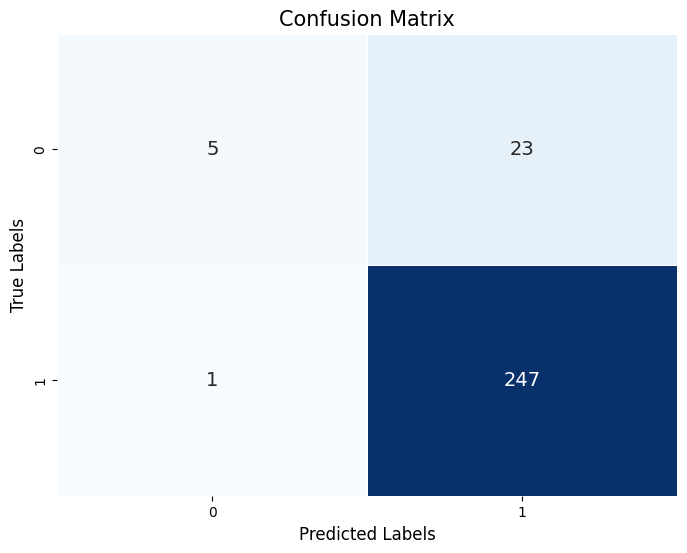

In [196]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 14}, linewidths=0.5) #  Seaborn 라이브러리의 heatmap을 그립니다. 
plt.title('Confusion Matrix', fontsize=15) # 제목 설정
plt.xlabel('Predicted Labels', fontsize=12) # x축 제목 설정
plt.ylabel('True Labels', fontsize=12) # y축 제목 설정
plt.show()

숫자가 큰 부분일수록 파란색이 짙어지는것을 알 수 있습니다.

다음은 ROC 곡선 시각화 입니다.

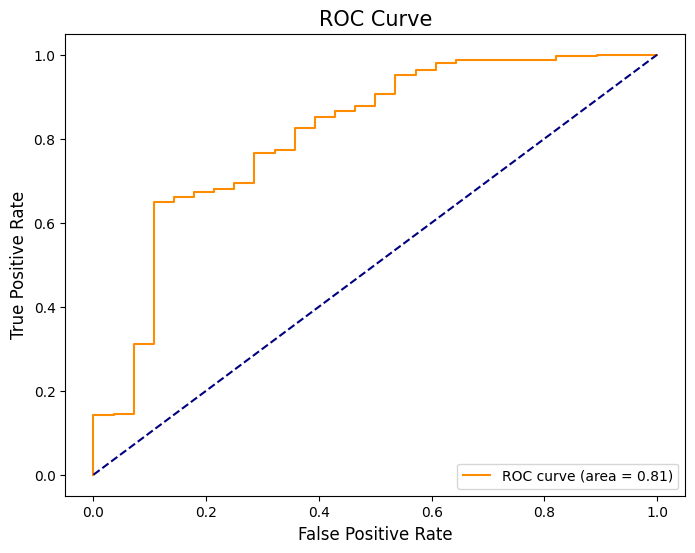

In [197]:
from sklearn.metrics import roc_curve, auc
# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_scores) # fpr는 거짓 양성 비율이고 tp는 진짜 양성 비율입니다.
roc_auc = auc(fpr, tpr) # auc는 곡선의 아래 면적을 계산합니다. 

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})') # x축은 fpr, y축은 tpr로 그래프를 그립니다. 라벨로 roc_auc값(면적의 넓이)을 표시합니다.
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # 기준선 그리기 (y=x 그래프 입니다)
plt.xlabel('False Positive Rate', fontsize=12) # 축 제목
plt.ylabel('True Positive Rate', fontsize=12) # y축 제목
plt.title('ROC Curve', fontsize=15) # 그래프 제목
plt.legend(loc='lower right') # 범례 위치
plt.show()

roc 곡선의 결과값은 조금더 욕심 내어보아도 괜찮을거 같습니다. 

roc곡선의 아래 면적의 넓이가 0.81로 나쁘진 않은 결과이지만 조금 더 올릴 수 있을거 같습니다.